In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [4]:
start = '2010-01-01' #YYYY-MM-DD
end = '2019-12-31'

df = yf.download('MSFT',start=start,end=end)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,,
2010-01-04 00:00:00+00:00,23.347321,30.950001,31.100000,30.590000,30.620001,38409100
2010-01-05 00:00:00+00:00,23.354860,30.959999,31.100000,30.639999,30.850000,49749600
2010-01-06 00:00:00+00:00,23.211538,30.770000,31.080000,30.520000,30.879999,58182400
2010-01-07 00:00:00+00:00,22.970140,30.450001,30.700001,30.190001,30.629999,50559700
2010-01-08 00:00:00+00:00,23.128553,30.660000,30.879999,30.240000,30.280001,51197400


In [5]:
df.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,,
2019-12-23 00:00:00+00:00,150.861755,157.410004,158.119995,157.270004,158.119995,17718200
2019-12-24 00:00:00+00:00,150.833023,157.380005,157.710007,157.119995,157.479996,8989200
2019-12-26 00:00:00+00:00,152.069336,158.669998,158.729996,157.399994,157.559998,14520600
2019-12-27 00:00:00+00:00,152.347275,158.960007,159.550003,158.220001,159.449997,18412800
2019-12-30 00:00:00+00:00,151.034256,157.589996,159.020004,156.729996,158.990005,16348400


In [6]:
df=df.reset_index() #Now date will not be dat
df.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT
0,2010-01-04 00:00:00+00:00,23.347321,30.950001,31.100000,30.590000,30.620001,38409100
1,2010-01-05 00:00:00+00:00,23.354860,30.959999,31.100000,30.639999,30.850000,49749600
2,2010-01-06 00:00:00+00:00,23.211538,30.770000,31.080000,30.520000,30.879999,58182400
3,2010-01-07 00:00:00+00:00,22.970140,30.450001,30.700001,30.190001,30.629999,50559700
4,2010-01-08 00:00:00+00:00,23.128553,30.660000,30.879999,30.240000,30.280001,51197400


In [7]:
#dropping (deleting the colummns that are not required)

df = df.drop(['Date', 'Adj Close' ],axis =1)
df.head()

C:\Users\katpa\AppData\Local\Temp\ipykernel_25008\1947058807.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date', 'Adj Close' ],axis =1)


Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
0,30.950001,31.100000,30.590000,30.620001,38409100
1,30.959999,31.100000,30.639999,30.850000,49749600
2,30.770000,31.080000,30.520000,30.879999,58182400
3,30.450001,30.700001,30.190001,30.629999,50559700
4,30.660000,30.879999,30.240000,30.280001,51197400


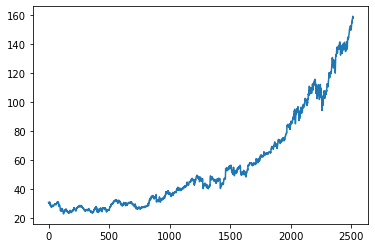

In [8]:
plt.plot(df.Close)

In [9]:
#Plotting Moving Average for first 100 values i.e it will take mean of first 100 values and for 101th value it will plot the graph

ma100 = df.Close.rolling(100).mean()
ma100

Ticker,MSFT
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2510,142.3618
2511,142.5666
2512,142.8312
2513,143.0739


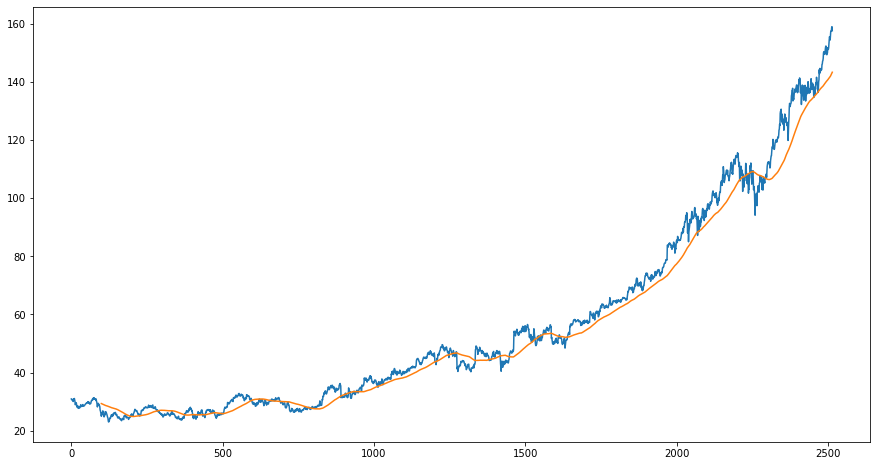

In [10]:
plt.figure(figsize=(15,8))
plt.plot(df.Close)
plt.plot(ma100)

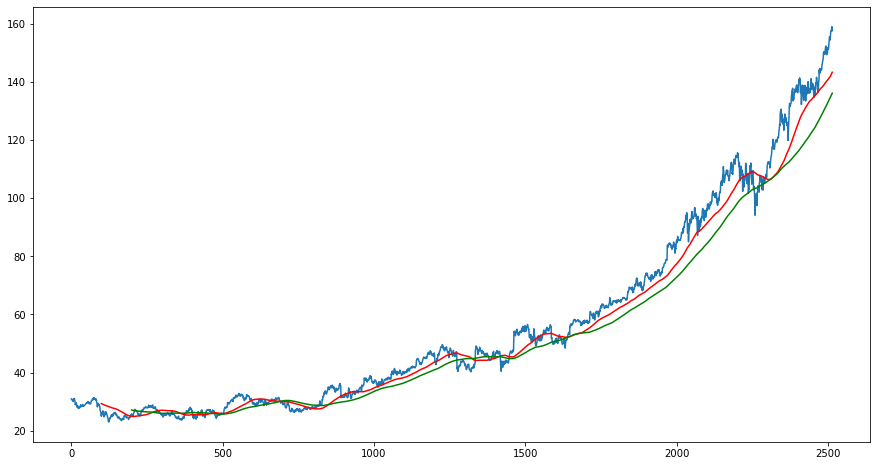

In [11]:
plt.figure(figsize=(15,8))
ma200 = df.Close.rolling(200).mean()
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [12]:
df.shape

(2515, 5)

In [13]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [14]:
data_training.head()

Ticker,MSFT
0,30.950001
1,30.959999
2,30.770000
3,30.450001
4,30.660000


In [15]:
data_training.tail()

Ticker,MSFT
1755,63.540001
1756,63.549999
1757,63.240002
1758,63.279999
1759,62.990002


In [16]:
data_testing.head()

Ticker,MSFT
1760,62.900002
1761,62.139999
1762,62.580002
1763,62.299999
1764,62.299999


In [17]:
data_testing.tail()

Ticker,MSFT
2510,157.410004
2511,157.380005
2512,158.669998
2513,158.960007
2514,157.589996


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [19]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.19551836],
       [0.19576457],
       [0.19108595],
       ...,
       [0.99064277],
       [0.99162767],
       [0.98448665]])

In [20]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i,0])
    y_train.append(data_training_array[i,0])
    
    
x_train,y_train = np.array(x_train), np.array(y_train)

In [21]:
x_train.shape

(1660, 100)

In [24]:
#Machine Learning models

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [25]:

from keras.models import Sequential  

model = Sequential()
model.add(LSTM(units=50,activation = 'relu',return_sequences = True, input_shape = (x_train.shape[1],1)))

model.add(Dropout(0.2))

model.add(LSTM(units=60,activation = 'relu',return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation = 'relu',return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units=80,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [26]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 80)                  │          51,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 80)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              81 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 133,761 (522.50 KB)

 Trainable params: 133,761 (522.50 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train,y_train,epochs =50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 22s 277ms/step - loss: 0.0863
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 244ms/step - loss: 0.0097
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 255ms/step - loss: 0.0081
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 248ms/step - loss: 0.0075
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 234ms/step - loss: 0.0075
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 249ms/step - loss: 0.0077
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 289ms/step - loss: 0.0072
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 253ms/step - loss: 0.0066
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 269ms/step - loss: 0.0064
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 251ms/step - loss: 0.0064
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 252ms/step - loss: 0.0053
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 193ms/step - loss: 0.0053
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 156ms/step - loss: 0.0055
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - loss: 0.0061
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 146

In [87]:
model.save('keras_model_MSFT.h5')

In [28]:
data_testing.head()

Ticker,MSFT
1760,62.900002
1761,62.139999
1762,62.580002
1763,62.299999
1764,62.299999


In [29]:
past_100_days = data_training.tail(100)

In [30]:
final_df=past_100_days.append(data_testing,ignore_index=True)
final_df.head()

C:\Users\katpa\AppData\Local\Temp\ipykernel_25008\1277850647.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing,ignore_index=True)


Ticker,MSFT
0,58.060001
1,58.200001
2,58.020000
3,58.299999
4,57.939999


In [31]:
final_df

Ticker,MSFT
0,58.060001
1,58.200001
2,58.020000
3,58.299999
4,57.939999
...,...
850,157.410004
851,157.380005
852,158.669998
853,158.960007


In [32]:
scaler = MinMaxScaler(feature_range=(0, 1))
#scaled_data = scaler.fit_transform(input_data)

input_data = scaler.fit_transform(final_df)
input_data

array([[1.80048871e-02],
       [1.93674115e-02],
       [1.76155838e-02],
       [2.03406326e-02],
       [1.68369773e-02],
       [1.85888049e-02],
       [1.19707976e-02],
       [1.31387074e-02],
       [1.35279736e-02],
       [1.37226252e-02],
       [1.42092358e-02],
       [1.63503667e-02],
       [1.69343216e-02],
       [1.90754155e-02],
       [1.77128911e-02],
       [1.83941533e-02],
       [1.63503667e-02],
       [1.21654492e-02],
       [1.34306663e-02],
       [1.42092358e-02],
       [1.36253180e-02],
       [1.41119285e-02],
       [1.18734903e-02],
       [0.00000000e+00],
       [8.17518336e-03],
       [3.11435203e-03],
       [4.86610544e-04],
       [9.53770773e-03],
       [1.01216627e-02],
       [7.00731063e-03],
       [5.83943790e-03],
       [1.50851496e-02],
       [1.56691045e-02],
       [1.18734903e-02],
       [6.71535173e-03],
       [1.69343216e-02],
       [1.77128911e-02],
       [1.15815314e-02],
       [1.35279736e-02],
       [1.17761459e-02],


In [93]:
input_data.shape

(855, 1)

In [34]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i,0])
    y_test.append(input_data[i,0])
    
x_test,y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100)
(755,)


In [35]:
#making predictions

y_predicted = model.predict(x_test)
y_predicted.shape

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


(755, 1)

In [96]:
y_test

array([0.06510951, 0.05771289, 0.06199516, 0.05927007, 0.05927007,
       0.06452555, 0.06257907, 0.06238442, 0.06793186, 0.06228711,
       0.06316303, 0.06150851, 0.06121655, 0.05927007, 0.06355233,
       0.06569343, 0.07114356, 0.07270074, 0.07844279, 0.09313868,
       0.08681263, 0.08214114, 0.07172752, 0.06773721, 0.07270074,
       0.07231143, 0.07026765, 0.06939173, 0.07639901, 0.07581509,
       0.0828224 , 0.08136253, 0.08097323, 0.08087588, 0.08184918,
       0.08058392, 0.07931874, 0.08184918, 0.08184918, 0.07805356,
       0.07562044, 0.08496353, 0.07591243, 0.07824818, 0.07844279,
       0.07970805, 0.0854501 , 0.08291974, 0.08486619, 0.08272505,
       0.07980539, 0.08311436, 0.08204379, 0.08428227, 0.08486619,
       0.07785887, 0.08583941, 0.08428227, 0.08535283, 0.08652067,
       0.08836984, 0.09012167, 0.09245741, 0.09391728, 0.09090028,
       0.0926521 , 0.09099755, 0.0926521 , 0.09216546, 0.09070559,
       0.09021901, 0.08778592, 0.0850608 , 0.09021901, 0.08934

In [97]:
y_predicted

array([[0.09121077],
       [0.09209251],
       [0.09256881],
       [0.09263927],
       [0.09233079],
       [0.09170019],
       [0.09085815],
       [0.08991443],
       [0.08896496],
       [0.08811982],
       [0.08743049],
       [0.08691772],
       [0.08656861],
       [0.08635285],
       [0.08622301],
       [0.0861604 ],
       [0.08617009],
       [0.08629397],
       [0.08657676],
       [0.08707644],
       [0.08792221],
       [0.08916061],
       [0.09072717],
       [0.09242839],
       [0.09402689],
       [0.09535682],
       [0.09631985],
       [0.09687383],
       [0.0970186 ],
       [0.09683606],
       [0.09643432],
       [0.09596447],
       [0.09555291],
       [0.09528433],
       [0.09519871],
       [0.09530443],
       [0.09557469],
       [0.0959562 ],
       [0.09640447],
       [0.09688038],
       [0.09732738],
       [0.09768049],
       [0.09794798],
       [0.09810808],
       [0.09815548],
       [0.09809907],
       [0.09796531],
       [0.097

In [98]:
scaler.scale_

array([0.00973236])

In [99]:
scale_factor = 1 / scaler.scale_[0]
y_predicted = y_predicted * scale_factor
y_test = y_test*scale_factor
print(y_predicted)

[[ 9.371907 ]
 [ 9.462506 ]
 [ 9.511446 ]
 [ 9.518685 ]
 [ 9.486989 ]
 [ 9.422195 ]
 [ 9.335676 ]
 [ 9.238708 ]
 [ 9.14115  ]
 [ 9.054312 ]
 [ 8.983483 ]
 [ 8.930797 ]
 [ 8.894925 ]
 [ 8.872756 ]
 [ 8.859415 ]
 [ 8.852982 ]
 [ 8.853977 ]
 [ 8.866706 ]
 [ 8.895762 ]
 [ 8.947104 ]
 [ 9.034007 ]
 [ 9.161253 ]
 [ 9.322218 ]
 [ 9.497018 ]
 [ 9.661264 ]
 [ 9.7979145]
 [ 9.896866 ]
 [ 9.953787 ]
 [ 9.968662 ]
 [ 9.949906 ]
 [ 9.9086275]
 [ 9.86035  ]
 [ 9.818063 ]
 [ 9.790465 ]
 [ 9.781669 ]
 [ 9.792531 ]
 [ 9.8203   ]
 [ 9.8595   ]
 [ 9.9055605]
 [ 9.95446  ]
 [10.000389 ]
 [10.036671 ]
 [10.064156 ]
 [10.080606 ]
 [10.085477 ]
 [10.0796795]
 [10.065936 ]
 [10.0511465]
 [10.040481 ]
 [10.038319 ]
 [10.045723 ]
 [10.05982  ]
 [10.078591 ]
 [10.099595 ]
 [10.121945 ]
 [10.145574 ]
 [10.166047 ]
 [10.183614 ]
 [10.198993 ]
 [10.213625 ]
 [10.229469 ]
 [10.249084 ]
 [10.275232 ]
 [10.310839 ]
 [10.358313 ]
 [10.415928 ]
 [10.480899 ]
 [10.548545 ]
 [10.614963 ]
 [10.676599 ]
 [10.729717 ]
 [10.7

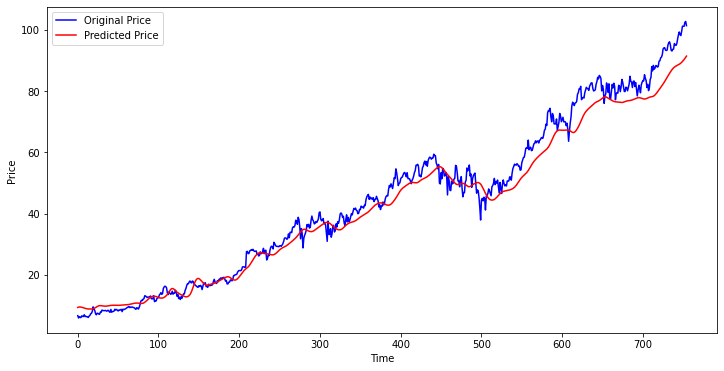

In [100]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label = "Original Price")
plt.plot(y_predicted,'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()